# Importing libraries

In [39]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score

import plotly.offline as pyo
import plotly.graph_objs as go

import re

from nltk.stem import WordNetLemmatizer

from tqdm import tqdm

In [40]:
import warnings
warnings.filterwarnings(action='ignore') 

# 데이터 불러오기

In [41]:
df = pd.read_csv('G://내 드라이브/Github/2022-Data-ton/dataset/MBTI_train.csv', encoding='ISO-8859-1', header=None)

In [42]:
df.head

<bound method NDFrame.head of           0                                                  1
0      INTP  say process model list like subscriber channel...
1      INFJ  upon much manipulate retail finish like sacrif...
2      INFJ  fit yes certain bff social feel goal go know n...
3      INTJ  complete love within someone ideal joke solvea...
4      ENTJ  public strictly thing person x question person...
...     ...                                                ...
74352  INTP  get consequence process life back kind great b...
74353  ENFP  mundane really right vibe natural u conscious ...
74354  INFP  diva message remember practical lot absorb tel...
74355  INTJ  increase impressive group make recognize get a...
74356  ENTJ  restaurant negative entj resent people sing ma...

[74357 rows x 2 columns]>

In [43]:
df.columns = ['type', 'text']

In [44]:
print(f"Total of {len(df['type'].unique())} types of classified MBTI posts")

Total of 16 types of classified MBTI posts


# 결측치 확인

In [45]:
df.isnull().sum()

type    0
text    0
dtype: int64

# 텍스트별 MBTI 빈도 확인

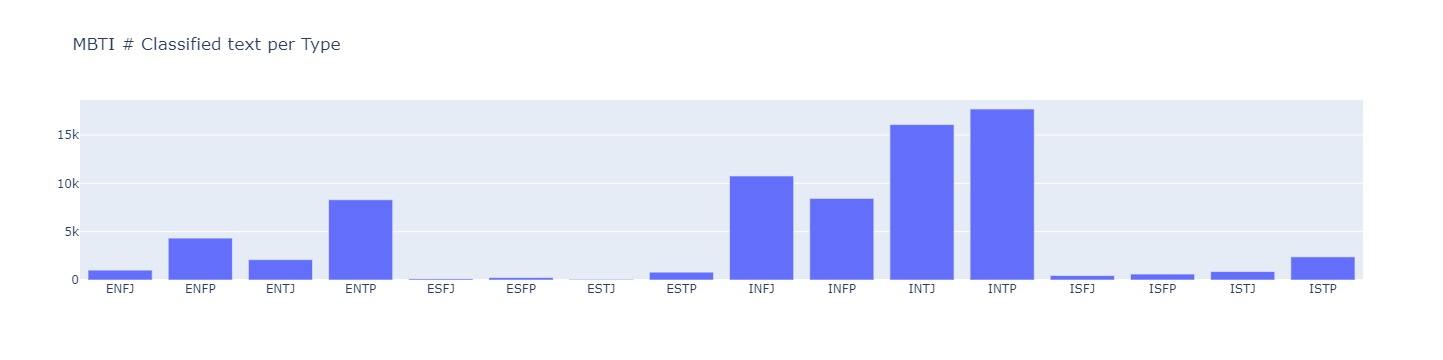

In [46]:
df_bar_chart=df.groupby('type').count()
trace1 = go.Bar(x=df_bar_chart.index, y=df_bar_chart['text'])
data = [trace1]
layout = go.Layout(title='MBTI # Classified text per Type')
fig = go.Figure(data=data, layout=layout)
fig.show()

# 데이터 전처리 / Train, Validation 분할

In [47]:
#function to clean the text data
def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in tqdm(data.text):
        sentence=sentence.lower()
#         removing links from text data
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
#         removing other symbols
        sentence=re.sub('[^0-9a-z]',' ',sentence)
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length

df.text, _=clear_text(df)

100%|██████████████████████████████████████████████████████████████████████████| 74357/74357 [00:11<00:00, 6480.24it/s]


In [48]:
X = df['text'] # features
y = df['type']  # labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train

In [49]:
# Creating an instance to vectorizer:
vectorizer = TfidfVectorizer(sublinear_tf = True)
    
# Training the vectorizer:
X_train_tfidf = vectorizer.fit_transform(X_train)
    
# Training the classifier:    
clf = LinearSVC(C = 0.475)
clf.fit(X_train_tfidf, y_train)

LinearSVC(C=0.475)

In [50]:
# Pipelining the vectorizer and the classifier
text_clf = Pipeline([('tfidf',TfidfVectorizer(sublinear_tf = True)),('clf',LinearSVC(C = 0.475))])

In [51]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(sublinear_tf=True)),
                ('clf', LinearSVC(C=0.475))])

# Validation Set 사용하여 정확도 측정

In [67]:
# 실행

In [82]:
predictions = text_clf.predict(X_test)

In [83]:
predictions

array(['ENTP', 'INTJ', 'INFJ', ..., 'INTJ', 'INTP', 'INTP'], dtype=object)

In [84]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        ENFJ       0.85      0.55      0.66       210
        ENFP       0.78      0.73      0.75       828
        ENTJ       0.90      0.72      0.80       430
        ENTP       0.83      0.83      0.83      1582
        ESFJ       1.00      0.22      0.36        27
        ESFP       1.00      0.33      0.50        51
        ESTJ       0.00      0.00      0.00        11
        ESTP       0.92      0.79      0.85       169
        INFJ       0.80      0.83      0.81      2232
        INFP       0.79      0.78      0.78      1720
        INTJ       0.80      0.85      0.82      3225
        INTP       0.80      0.86      0.83      3493
        ISFJ       0.76      0.38      0.51        92
        ISFP       0.75      0.34      0.47       139
        ISTJ       0.86      0.51      0.64       198
        ISTP       0.83      0.73      0.78       465

    accuracy                           0.81     14872
   macro avg       0.79   

In [85]:
print(f"Overall accuracy of the model: {round(metrics.accuracy_score(y_test, predictions),2)}")

Overall accuracy of the model: 0.81


---

# Submit

In [57]:
test_df = pd.read_csv('G://내 드라이브/Github/2022-Data-ton/dataset/MBTI_test.csv', encoding='ISO-8859-1', header=None)

In [58]:
test_df.columns

Int64Index([0], dtype='int64')

In [59]:
test_df.columns = ['text']

In [60]:
test_df.text, _ = clear_text(test_df)

100%|████████████████████████████████████████████████████████████████████████████| 9337/9337 [00:01<00:00, 6875.70it/s]


In [61]:
# Creating an instance to vectorizer:
vectorizer = TfidfVectorizer(sublinear_tf = True)
    
# Training the vectorizer:
X_tfidf = vectorizer.fit_transform(X)
    
# Training the classifier:
clf2 = LinearSVC(C=0.475)
clf2.fit(X_tfidf, y)
    
# Pipelining the vectorizer and the classifier
text_clf2 = Pipeline([('tfidf',TfidfVectorizer(sublinear_tf = True)),('clf',LinearSVC(C=0.475))])
text_clf2.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer(sublinear_tf=True)),
                ('clf', LinearSVC(C=0.475))])

In [62]:
# 실행

In [86]:
predictions = text_clf2.predict(test_df['text'])

In [87]:
predictions = pd.DataFrame(predictions)

In [88]:
predictions

,0
0,ENFP
1,ENTP
2,INTJ
3,INTJ
4,INTJ
...,...
9332,ENTP
9333,INTP
9334,INTP
9335,ENFP


In [66]:
predictions.to_csv('Final_result_team15.csv', index=False, header=False)